image has been loaded
IMG_width = 458
IMG_height = 312
142896


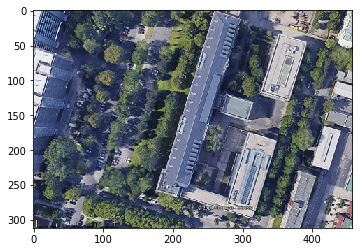

In [7]:
##k-means

import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image
import math

img1 = Image.open("test.tif")
img1 = img1.convert('RGB')  #it doesn't work for RGBA
img1_data = img1.load()

print('image has been loaded')
print("IMG_width = " + str(img1.width))
print("IMG_height = " + str(img1.height))
npixels = img1.width*img1.height
print(npixels)

plt.imshow(img1)

In [190]:
kd_record = []
k = 1
limit = 12
while k <= limit:
    print("*************     processing k="+str(k)+"      ************")
    n_clusters = k
    clusters = []
    k_means = []
    for i in range(n_clusters):
        #print (i)
        clusters.append([])
        k_means.append([])
        ranx = random.randint (0,img1.width-1)
        rany = random.randint (0,img1.height-1)
        clusters[i].append(img1_data[ranx, rany])
        k_means[i].append(img1_data[ranx, rany])
    print("classification for k=" + str(k) + " is being computed")
    seeker_column = 0
    while seeker_column < img1.width:
        seeker_row = 0
        while seeker_row < img1.height:
            pixel_RGB = img1_data[seeker_column, seeker_row]
            #print("classified pixel: "+ str(pixel_RGB))
            distances=[]
            for j in range(n_clusters):
                distances.append([])
                integrers = k_means[j]
                mean_values = integrers[0] 
                k_meanR = mean_values[0]
                k_meanG = mean_values[1]
                k_meanB = mean_values[2]
                
                a = abs(pixel_RGB[0]-k_meanR)
                b = abs(pixel_RGB[1]-k_meanG)
                c = abs(pixel_RGB[2]-k_meanB)
                distance = math.sqrt(a**2+b**2+c**2)
                distances[j].append(distance)
            criteria = 10000
            n = 0
            while n < len(distances):
                converter = distances [n]
                operator = converter [0]
                if operator < criteria:
                    criteria = operator
                    cluster = n
                n = n + 1
            clusters[cluster].append(img1_data[seeker_column, seeker_row])
            mean = np.mean(clusters[cluster],axis=0)
            #print(mean)
            meanR = int(mean[0])
            meanG = int(mean[1])
            meanB = int(mean[2])
            k_means[cluster]=[(meanR,meanG,meanB)]
            #print("selected cluster: "+ str(cluster))
            #print("mean of cluster " + str(cluster) +" readjusted to " +str(k_means[cluster]))
            seeker_row = seeker_row + 1
            #print("pixel "+str(seeker_row)+ ", " + str(seeker_column) + " has been analised")
        seeker_column = seeker_column + 1
    #print (clusters)
    #for m in range (k):
    #for values in clusters[cluster]:
    #clusters calcula d a la mean de cada cluster
    #suma todos los clusters para allar la distorsion
    #kd_record.append(k,distortion)
    print("computing distortion")
    total_dis = 0
    counter=0
    for m in range(k):
        distortion_cluster = 0
        print("processing distortion cluster..."+(str(m)))
        for pixels in clusters[m]:
            k_cluster= k_means[m]
            converted=k_cluster[0]
            k_clusterR= converted[0]
            k_clusterG= converted[0]
            k_clusterB= converted[0]
            d = abs(pixels[0]-k_clusterR)
            e = abs(pixels[1]-k_clusterG)
            f = abs(pixels[2]-k_clusterB)
            dis = math.sqrt(d**2+e**2+f**2)
            distortion_cluster = distortion_cluster + dis
        total_dis = total_dis+distortion_cluster
        print("distortion cluster = " + str(m) + " is " + str(distortion_cluster))
    kd_record.append(total_dis)   
    print("total distortion for k= "+ str(k) + " is " + str(total_dis))
    k=k+1
print("the length of cluster list is: "+ str(len(clusters)))
print("the length of K-means list is: "+ str(len(clusters)))
print("the final value of k is: "+ str(k))
#print("Number of pixels analysed: ",pixl_num, "pixels")
#print("Number of colors in the RGB Image pallette: ",len(rgb_pallette), "colors")

*************     processing k=1      ************
classification for k=1 is being computed
computing distortion
processing distortion cluster...0
distortion cluster = 0 is 11274896.858506
total distortion for k= 1 is 11274896.858506
*************     processing k=2      ************
classification for k=2 is being computed
computing distortion
processing distortion cluster...0
distortion cluster = 0 is 5198202.576132058
processing distortion cluster...1
distortion cluster = 1 is 2056189.2083662201
total distortion for k= 2 is 7254391.784498278
*************     processing k=3      ************
classification for k=3 is being computed
computing distortion
processing distortion cluster...0
distortion cluster = 0 is 3038993.9734384594
processing distortion cluster...1
distortion cluster = 1 is 1995171.6137289274
processing distortion cluster...2
distortion cluster = 2 is 876829.6203047481
total distortion for k= 3 is 5910995.207472135
*************     processing k=4      ************
cl

In [191]:
l=0
suma = 0
print ("************    RESULTS   ************")
for l in range(len(clusters)):
    print("Cluster "+str(l)+ " has " + str(len(clusters[l])) + " objects")
    suma = suma + len(clusters[l])
print ("********************************************")
print ("total number of processed pixels = "+str(suma))
print ("********************************************")

************    RESULTS   ************
Cluster 0 has 11401 objects
Cluster 1 has 12528 objects
Cluster 2 has 14773 objects
Cluster 3 has 13294 objects
Cluster 4 has 11174 objects
Cluster 5 has 11849 objects
Cluster 6 has 10187 objects
Cluster 7 has 15622 objects
Cluster 8 has 12843 objects
Cluster 9 has 10248 objects
Cluster 10 has 6400 objects
Cluster 11 has 12589 objects
********************************************
total number of processed pixels = 142908
********************************************


[11274896.858506, 7254391.784498278, 5910995.207472135, 5227605.0230002925, 5206083.6734984, 5128766.382585779, 4906800.183286405, 4962215.651277184, 4911413.085908815, 4877270.736383969, 4802476.615857461, 4826962.939572651]
[(11274896.858506, 1), (7254391.784498278, 2), (5910995.207472135, 3), (5227605.0230002925, 4), (5206083.6734984, 5), (5128766.382585779, 6), (4906800.183286405, 7), (4962215.651277184, 8), (4911413.085908815, 9), (4877270.736383969, 10), (4802476.615857461, 11)]
[(4020505.0740077216, 1), (1343396.5770261427, 2), (683390.1844718428, 3), (21521.349501892924, 4), (77317.29091262072, 5), (221966.19929937366, 6), (55415.46799077839, 7), (50802.56536836829, 8), (34142.3495248463, 9), (74794.12052650843, 10), (24486.323715190403, 11)]


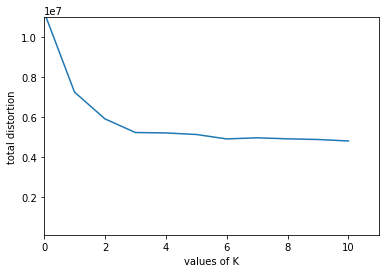

In [206]:
print(kd_record)
k_plot = list()
k_plotdiff = list()
pos = 0
p= 0
for p in range (k-1):
    pos = p+1
    if pos==k-1:
        break
    else:
        diff = abs(kd_record[p] - kd_record[pos])
    x = (kd_record[p], pos)
    y = (diff, pos)
    k_plot.append(x)
    k_plotdiff.append(y)
print(k_plot)
print(k_plotdiff)
plt.ylabel("total distortion")
plt.xlabel("values of K")
plt.xlim([0, 11])
plt.ylim([100000, 11000000])
plt.plot(k_plot)
#plt.plot(k_plotdiff)

In [157]:
kd_record = []
k = 8
iteration=1
conv_criteria = 99.999
convergence = 0
print("*************     processing classification for k="+str(k)+"      ************")

while convergence <= conv_criteria:
    print( "**********************        iteration..." + str(iteration) + "       *******************")
    if iteration == 1:
        n_clusters = k
        clusters = []
        k_means = []
        z=0
        for z in range(n_clusters):
            #print (i)
            clusters.append([])
            k_means.append([])
            ranx = random.randint (0,img1.width-1)
            rany = random.randint (0,img1.height-1)
            clusters[z].append(img1_data[ranx, rany])
            k_means[z].append(img1_data[ranx, rany])
    else:
        z=0
        n_cluster= k
        clusters = []
        k_means = k_means
        for z in range(n_clusters):
            clusters.append([])
    print(k_means)
    seeker_column = 0
    while seeker_column < img1.width:
        seeker_row = 0
        while seeker_row < img1.height:
            pixel_RGB = img1_data[seeker_column, seeker_row]
            #print("classified pixel: "+ str(pixel_RGB))
            distances=[]
            for j in range(n_clusters):
                distances.append([])
                integrers = k_means[j]
                mean_values = integrers[0] 
                k_meanR = mean_values[0]
                k_meanG = mean_values[1]
                k_meanB = mean_values[2]
                
                a = abs(pixel_RGB[0]-k_meanR)
                b = abs(pixel_RGB[1]-k_meanG)
                c = abs(pixel_RGB[2]-k_meanB)
                distance = math.sqrt(a**2+b**2+c**2)
                distances[j].append(distance)
            criteria = 10000
            n = 0
            while n < len(distances):
                converter = distances [n]
                operator = converter [0]
                if operator < criteria:
                    criteria = operator
                    cluster = n
                n = n + 1
            clusters[cluster].append(img1_data[seeker_column, seeker_row])
            mean = np.mean(clusters[cluster],axis=0)
            #print(mean)
            meanR = int(mean[0])
            meanG = int(mean[1])
            meanB = int(mean[2])
            k_means[cluster]=[(meanR,meanG,meanB)]
            #print("selected cluster: "+ str(cluster))
            #print("mean of cluster " + str(cluster) +" readjusted to " +str(k_means[cluster]))
            seeker_row = seeker_row + 1
            #print("pixel "+str(seeker_row)+ ", " + str(seeker_column) + " has been analised")
        seeker_column = seeker_column + 1
        total_dis = 0
    print("computing distortion")
    total_dis = 0
    for m in range(k):
        distortion_cluster = 0
        print("processing distortion cluster..."+(str(m)))
        for pixels in clusters[m]:
            k_cluster= k_means[m]
            converted=k_cluster[0]
            k_clusterR= converted[0]
            k_clusterG= converted[0]
            k_clusterB= converted[0]
            d = abs(pixels[0]-k_clusterR)
            e = abs(pixels[1]-k_clusterG)
            f = abs(pixels[2]-k_clusterB)
            dis = math.sqrt(d**2+e**2+f**2)
            distortion_cluster = distortion_cluster + dis
        total_dis = total_dis+distortion_cluster
        print("distortion cluster = " + str(m) + " is " + str(distortion_cluster))
    kd_record.append(total_dis)   
    print("total distortion for k= "+ str(k) + " is " + str(total_dis))
    if iteration == 1:
        convergence = convergence
        print(kd_record)
    else:
        print(kd_record)
        convergence = (kd_record[iteration-2]/kd_record[iteration-1])*100
    print ("current convergence: "+str(convergence)+ "%")
    iteration=iteration+1
print("the length of cluster list is: "+ str(len(clusters)))
print("the length of K-means list is: "+ str(len(clusters)))
print("the employed value of k is: "+ str(k))
#print("Number of pixels analysed: ",pixl_num, "pixels")
#print("Number of colors in the RGB Image pallette: ",len(rgb_pallette), "colors")

*************     processing classification for k=8      ************
**********************        iteration...1       *******************
[[(43, 62, 77)], [(44, 53, 91)], [(61, 69, 82)], [(216, 215, 216)], [(19, 28, 50)], [(216, 211, 207)], [(125, 125, 147)], [(44, 51, 80)]]
computing distortion
processing distortion cluster...0
distortion cluster = 0 is 629915.9295902887
processing distortion cluster...1
distortion cluster = 1 is 787125.5596154276
processing distortion cluster...2
distortion cluster = 2 is 607730.1098302815
processing distortion cluster...3
distortion cluster = 3 is 200933.6205930141
processing distortion cluster...4
distortion cluster = 4 is 671823.9610026792
processing distortion cluster...5
distortion cluster = 5 is 349994.5615631167
processing distortion cluster...6
distortion cluster = 6 is 598718.6343228823
processing distortion cluster...7
distortion cluster = 7 is 1051978.0232737015
total distortion for k= 8 is 4898220.399791391
[4898220.399791391]
current c

In [158]:
l=0
suma = 0
print ("************    RESULTS   ************")
for l in range(len(clusters)):
    print("Cluster "+str(l)+ " has " + str(len(clusters[l])) + " objects")
    suma = suma + len(clusters[l])
print ("********************************************")
print ("total number of processed pixels = "+str(suma))
print ("********************************************")

************    RESULTS   ************
Cluster 0 has 20147 objects
Cluster 1 has 17296 objects
Cluster 2 has 10681 objects
Cluster 3 has 12095 objects
Cluster 4 has 23728 objects
Cluster 5 has 13981 objects
Cluster 6 has 15822 objects
Cluster 7 has 29146 objects
********************************************
total number of processed pixels = 142896
********************************************


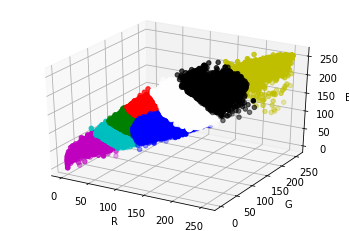

In [159]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Generate the values

for h in range(len(clusters)):
    cluster=clusters[h]
    x_vals = []
    y_vals = []
    z_vals = []
    for valores in cluster:
        pixelito=valores
        x_vals.append(pixelito[0])
        y_vals.append(pixelito[1])
        z_vals.append(pixelito[2])
    if h==0:
        ax.scatter(x_vals,y_vals, z_vals, c="b", marker="o")
    if h==1:
        ax.scatter(x_vals,y_vals, z_vals, c="g", marker="o")
    if h==2:
        ax.scatter(x_vals,y_vals, z_vals, c="r", marker="o")
    if h==3:
        ax.scatter(x_vals,y_vals, z_vals, c="y", marker="o")
    if h==4:
        ax.scatter(x_vals,y_vals, z_vals, c="m", marker="o")
    if h==5:
        ax.scatter(x_vals,y_vals, z_vals, c="k", marker="o")
    if h==6:
        ax.scatter(x_vals,y_vals, z_vals, c="w", marker="o")
    if h==7:
        ax.scatter(x_vals,y_vals, z_vals, c="c", marker="o")
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
plt.show()

***************     creating mask          **********************
***************     mask has been successfuly created          **********************
******************       the results are shown below  **********************


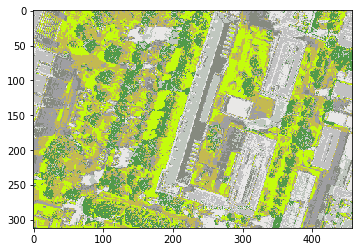

In [161]:
mask = Image.open("test.tif")
mask = mask.convert('RGB')  #it doesn't work for RGBA
mask_data = mask.load()

Colors=[(81,154,73),(159,159,162),(134,138,127),(193,193,193),(196,252,13),(233,232,231),(192,199,191), (196,185,81)]

print("***************     creating mask          **********************")

seeker_column = 0
while seeker_column < mask.width:
    seeker_row = 0
    while seeker_row < mask.height:
        point = img1_data[seeker_column,seeker_row]
        for w in range(len(clusters)):
            data=clusters[w]
            for position in range(len(data)):
                if data[position] == point:
                    mask_data[seeker_column,seeker_row]= Colors[w]

        seeker_row = seeker_row + 1
    seeker_column = seeker_column + 1
print("***************     mask has been successfuly created          **********************")
print("******************       the results are shown below  **********************")
plt.imshow(mask)

In [177]:
colour_labels=("Dark green","dark grey","gray", "light grey", "yellow/lg", "light grey", "LIGHT GREY","SAND YELLOW")
pixelsize = input("introduce the pixel size in cm")
pixelsize = int(pixelsize)/100
print(len(clusters))

l=0
totalarea = 0
totalpixel = 0
print ("************    RESULTS   ************")
for l in range(len(clusters)):
    area_cluster=0
    numpix=len(clusters[l])
    area_cluster = numpix * pixelsize
    print("area cluster "+str(l)+" equal to "+ str(int(area_cluster))+" square meters")
    totalarea = totalarea + area_cluster
    totalpixel = totalpixel+len(clusters[l])
print ("********************************************")
print ("total number of processed pixels = "+str(int(totalpixel)))
print ("total computed area = "+str(int(totalarea))+ " square meters")
print ("********************************************")

introduce the pixel size in cm20
8
************    RESULTS   ************
area cluster 0 equal to 4029 square meters
area cluster 1 equal to 3459 square meters
area cluster 2 equal to 2136 square meters
area cluster 3 equal to 2419 square meters
area cluster 4 equal to 4745 square meters
area cluster 5 equal to 2796 square meters
area cluster 6 equal to 3164 square meters
area cluster 7 equal to 5829 square meters
********************************************
total number of processed pixels = 142896
total computed area = 28579 square meters
********************************************


***************     calculating VDVI Index          **********************
***************     mask has been successfuly created          **********************
******************       the results are shown below  **********************


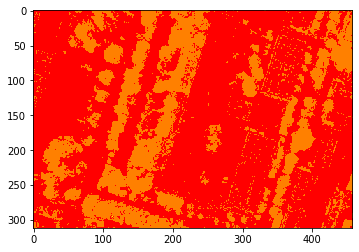

In [8]:
mask2 = Image.open("test.tif")
mask2 = mask2.convert('RGB')  #it doesn't work for RGBA
mask2_data = mask2.load()

colors_vdvi=[(255,0,0),(255,128,0),(255,255,0),(9,255,0)]

print("***************     calculating VDVI Index          **********************")
size = mask2.width*mask2.height
pixlcount = 0
seeker_column = 0
while seeker_column < mask2.width:
    seeker_row = 0
    while seeker_row < mask2.height:
        point = img1_data[seeker_column,seeker_row]
        num = 2*(point[1])-point[0]-point[2]
        den = 2*(point[1])+point[0]+point[2]
        if den==0:
            VDVI=0
        else:
            VDVI = num/den
        if VDVI <= 0:
            mask2_data[seeker_column,seeker_row]= colors_vdvi[0]
        else: 
            if VDVI <=0.3:
                mask2_data[seeker_column,seeker_row]= colors_vdvi[1]
            else:
                if VDVI <=0.7:
                    mask2_data[seeker_column,seeker_row]= colors_vdvi[2]
                else:
                    mask2_data[seeker_column,seeker_row]= colors_vdvi[3]

        seeker_row = seeker_row + 1
    seeker_column = seeker_column + 1
print("***************     mask has been successfuly created          **********************")
print("******************       the results are shown below  **********************")
plt.imshow(mask2)

In [208]:
print(point)

(0, 0, 0)
